Epoch: 1; Error: 8084.671059889358;
Epoch: 2; Error: 3793.6300622823383;
Epoch: 3; Error: 3792.501114877367;
Epoch: 4; Error: 3792.500005544966;
Epoch: 5; Error: 3792.500000014137;
Epoch: 6; Error: 3808.6007038418106;
Epoch: 7; Error: 3792.5;
Epoch: 8; Error: 3792.4999999999777;
Epoch: 9; Error: 4720.793988242095;
Epoch: 10; Error: 4202.92537813487;
Epoch: 11; Error: 3792.4997382111287;
Epoch: 12; Error: 3792.5;
Epoch: 13; Error: 3792.5;
Epoch: 14; Error: 3792.5;
Epoch: 15; Error: 3792.5;
Epoch: 16; Error: 3792.5;
Epoch: 17; Error: 3792.5;
Epoch: 18; Error: 3792.5;
Epoch: 19; Error: 3792.5;
Epoch: 20; Error: 3792.5;
The maximum number of train epochs is reached


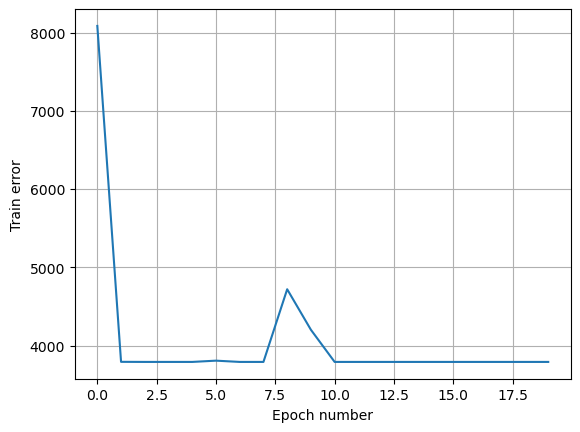

Accuracy:  6.666666666666667


In [5]:
import pandas as pd
import numpy as np
import neurolab as nl
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df=pd.read_csv("Date_Fruit_Datasets.csv")
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

en=LabelEncoder()
y=en.fit_transform(y)

n=[]
for i in y:
    n.append([i])
y=n

scaler =StandardScaler()
x=scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
inp=[]
for i in range(len(df.columns)-1):
    inp.append([min(x[i]),max(x[i])])

net = nl.net.newff(inp,[30,75,50,25,1])
net.trainf = nl.train.train_rprop
net.trainf = nl.train.train_rprop
error=net.train(x,y, epochs=20, show=1, lr=0.1)


import pylab as pl
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('Train error')
pl.grid()
pl.show()

y_pred_encoder=net.sim(X_test)
y_pred_encoded=np.argmax(y_pred_encoder,axis=1)

print("Accuracy: ",accuracy_score(y_test,y_pred_encoded)*100)